In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END  # type: ignore

In [2]:
class AgentState(TypedDict):
  number1: int
  number2: int
  operation: str
  result: int

In [8]:
def add_numbers(state: AgentState) -> AgentState:
  """This function adds two numbers and updates the state with the result."""
  state["result"] = state["number1"] + state["number2"]
  return state

def subtract_numbers(state: AgentState) -> AgentState:
  """This function subtracts two numbers and updates the state with the result."""
  state["result"] = state["number1"] - state["number2"]
  return state

def decide_next_node(state: AgentState) -> str:
  """This function decides the next node based on the operation specified in the state."""
  if state["operation"] == "+":
    return "addition_operation"
  elif state["operation"] == "-":
    return "subtraction_operation"
  else:
    raise ValueError("Invalid operation specified in the state.")

In [9]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add_numbers)  # Start node decides the next operation
graph.add_node("subtract_node", subtract_numbers)  # Start node decides the next operation
graph.add_node("router", lambda state: state)  # Start node decides the next operation

graph.add_edge(START, "router")  # Start node decides the next operation

graph.add_conditional_edges(
  "router", 
  decide_next_node,
  {
    # Edge: Node
    "addition_operation": "add_node",
    "subtraction_operation": "subtract_node"
  }
)  # Route to addition node if operation is "+"

graph.add_edge("add_node", END)  # End after addition
graph.add_edge("subtract_node", END)  # End after subtraction

app = graph.compile()

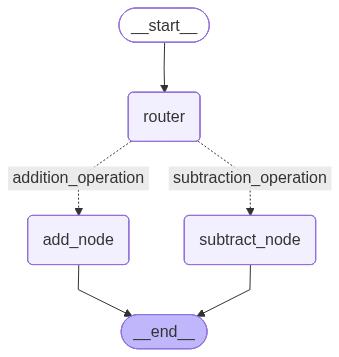

In [10]:
from IPython.display import display, Image # type: ignore
display(Image(app.get_graph().draw_mermaid_png()))  # Visualize the graph structure

In [13]:
result = app.invoke({"number1": 10, "number2": 5, "operation": "+"})  # Run the graph with initial state
print("Result:", result["result"])  # Check the result of addition

Result: 15


In [14]:
result = app.invoke(
    {"number1": 10, "number2": 5, "operation": "-"}
)  # Run the graph with initial state
print("Result:", result["result"])  # Check the result of addition

Result: 5


### Exercise for Graph 4

**Your task**: Make the graph on the right! You will need to make use of 2 conditional edges!

**Input**: Initial_state = AgentState(number1 = 10, operation1="-", number2 = 5, number3 = 7, number4 = 2, operation2 = "+", finalNumber1 = 0, finalNumber2 = 0)

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END  # type: ignore

In [2]:
class AgentState(TypedDict):
  number1: int
  operation1: str
  number2: int
  number3: int
  operation2: str
  number4: int
  finalNumber1: int
  finalNumber2: int

In [3]:
def add_numbers_1(state: AgentState) -> AgentState:
  """Add number1 and number2, store in finalNumber1."""
  state["finalNumber1"] = state["number1"] + state["number2"]
  return state

def add_numbers_2(state: AgentState) -> AgentState:
  """Add number3 and number4, store in finalNumber2."""
  state["finalNumber2"] = state["number3"] + state["number4"]
  return state

def subtract_numbers_1(state: AgentState) -> AgentState:
  """Subtract number2 from number1, store in finalNumber1."""
  state["finalNumber1"] = state["number1"] - state["number2"]
  return state

def subtract_numbers_2(state: AgentState) -> AgentState:
  """Subtract number4 from number3, store in finalNumber2."""
  state["finalNumber2"] = state["number3"] - state["number4"]
  return state

def decide_next_node_1(state: AgentState) -> str:
  """Decide whether to add or subtract for the first operation."""
  if state["operation1"] == "+":
    return "addition_operation"
  else:
    return "subtraction_operation"
  
def decide_next_node_2(state: AgentState) -> str:
  """Decide whether to add or subtract for the second operation."""
  if state["operation2"] == "+":
    return "addition_operation"
  else:
    return "subtraction_operation"  

In [4]:
graph = StateGraph(AgentState)

graph.add_node("addition_operation_1", add_numbers_1)  # Node for first addition
graph.add_node("addition_operation_2", add_numbers_2)  # Node for second

graph.add_node("subtraction_operation_1", subtract_numbers_1)  # Node for first subtraction
graph.add_node("subtraction_operation_2", subtract_numbers_2)  # Node for

graph.add_node("router1", lambda state: state)  # Router for first operation
graph.add_node("router2", lambda state: state)  # Router for second operation

graph.add_edge(START, "router1")  # Start node decides the first operation
graph.add_conditional_edges(
  "router1",
  decide_next_node_1,
  {
    # Edge: Node
    "addition_operation": "addition_operation_1",
    "subtraction_operation": "subtraction_operation_1"
  }
)  # Route to addition node if operation is "+"

graph.add_edge("addition_operation_1", "router2")  # After first addition, decide second operation
graph.add_edge("subtraction_operation_1", "router2")  # After first subtraction

graph.add_conditional_edges(
  "router2",
  decide_next_node_2,
  {
    # Edge: Node
    "addition_operation": "addition_operation_2",
    "subtraction_operation": "subtraction_operation_2"
  }
)

graph.add_edge("addition_operation_2", END)  # End after second addition
graph.add_edge("subtraction_operation_2", END)  # End after second subtraction

app = graph.compile()

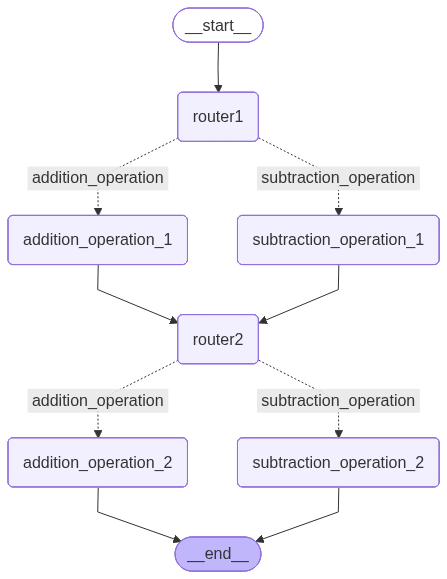

In [5]:
from IPython.display import display, Image # type: ignore
display(Image(app.get_graph().draw_mermaid_png()))  # Visualize the graph structure

In [8]:
app.invoke({
    "number1": 10,
    "operation1": "-",
    "number2": 5,
    "number3": 7,
    "number4": 2,
    "operation2": "+",
    "finalNumber1": 0,
    "finalNumber2": 0
})

{'number1': 10,
 'operation1': '-',
 'number2': 5,
 'number3': 7,
 'operation2': '+',
 'number4': 2,
 'finalNumber1': 5,
 'finalNumber2': 9}